# KNN

Aprendizado de Máquina não supervisionado

Algoritmo de Clusterização

### Importação das bibliotecas necessárias

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Carregamento da base

In [13]:
base = pd.read_csv('../bases/iris.csv')
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

### Divisão da base em treinamento (80%) e teste (20%)

In [14]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.20)

## KNN

Exemplo utilizando a distância euclidiana: $f(x,y) = \sqrt{\sum_{i}^{p} (x_i - y_i)^2}$	

In [15]:
classificador = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p = 2)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoesTrei = classificador.predict(previsores_treinamento)
previsoesTest = classificador.predict(previsores_teste)

### Acurácia

In [16]:
acuracia = accuracy_score(classe_treinamento, previsoesTrei)
print("Acurácia no Treinamento: "+ str(acuracia * 100)+ "%")


acuracia = accuracy_score(classe_teste, previsoesTest)
print("Acurácia no Teste: "+ str(acuracia * 100)+ "%")

Acurácia no Treinamento: 97.5%
Acurácia no Teste: 93.33333333333333%


### Matriz de Confusão

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Saída correta')
    plt.xlabel('Saída encontrada')    

### Matriz de Confusão - treinamento

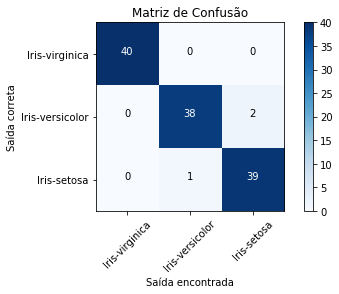

In [18]:
cm = confusion_matrix(classe_treinamento, previsoesTrei)
plot_confusion_matrix(cm, 
                      classes=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'],
                      title='Matriz de Confusão')

### Matriz de Confusão - teste

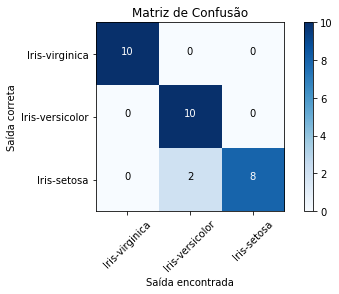

In [19]:
cm = confusion_matrix(classe_teste, previsoesTest)
plot_confusion_matrix(cm, 
                      classes=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'],
                      title='Matriz de Confusão')

### Transformação das classes em numérica

In [20]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
classesCalcTrei = labelEncoder.fit_transform(previsoesTrei)

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
classesCalcTest = labelEncoder.fit_transform(previsoesTest)

### Gráfico do Resultado do Treinamento

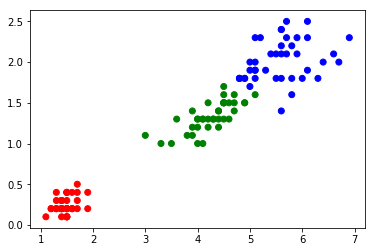

In [21]:
cores = np.array(['red', 'green', 'blue'])

x = previsores_treinamento[:,1]
y = previsores_treinamento[:,2]

plt.scatter(x, y, color= cores[classesCalcTrei]) 

### Gráfico do Resultado do Treinamento

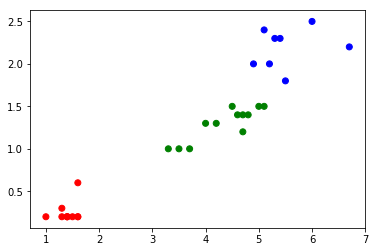

In [22]:
x = previsores_teste[:,1]
y = previsores_teste[:,2]

plt.scatter(x, y, color= cores[classesCalcTest]) 